In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [191]:
%matplotlib inline 

In [197]:
Amzn_data=pd.read_csv('C:\\Users\\Akshat tyagi\\Downloads\\archive (8)\\AMZN.csv')

In [198]:
Amzn_data


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,3268.159912,2790600


In [199]:
Amzn_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [200]:
Amzn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6257 non-null   object 
 1   Open       6257 non-null   float64
 2   High       6257 non-null   float64
 3   Low        6257 non-null   float64
 4   Close      6257 non-null   float64
 5   Adj Close  6257 non-null   float64
 6   Volume     6257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 342.3+ KB


In [201]:
Amzn_data =Amzn_data[['Date','Open','Close']]
Amzn_data['Date'] = pd.to_datetime(Amzn_data['Date'].apply(lambda x: x.split()[0]))
Amzn_data.set_index('Date',drop=True,inplace=True)
Amzn_data.loc['1997-05-15':'2022-03-24', ['Open', 'Close']]
Amzn_data.head()


C:\Users\Akshat tyagi\AppData\Local\Temp\ipykernel_5708\2206676143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amzn_data['Date'] = pd.to_datetime(Amzn_data['Date'].apply(lambda x: x.split()[0]))


,Open,Close
Date,,
1997-05-15,2.437500,1.958333
1997-05-16,1.968750,1.729167
1997-05-19,1.760417,1.708333
1997-05-20,1.729167,1.635417
1997-05-21,1.635417,1.427083


C:\Users\Akshat tyagi\AppData\Local\Temp\ipykernel_5708\1942921827.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


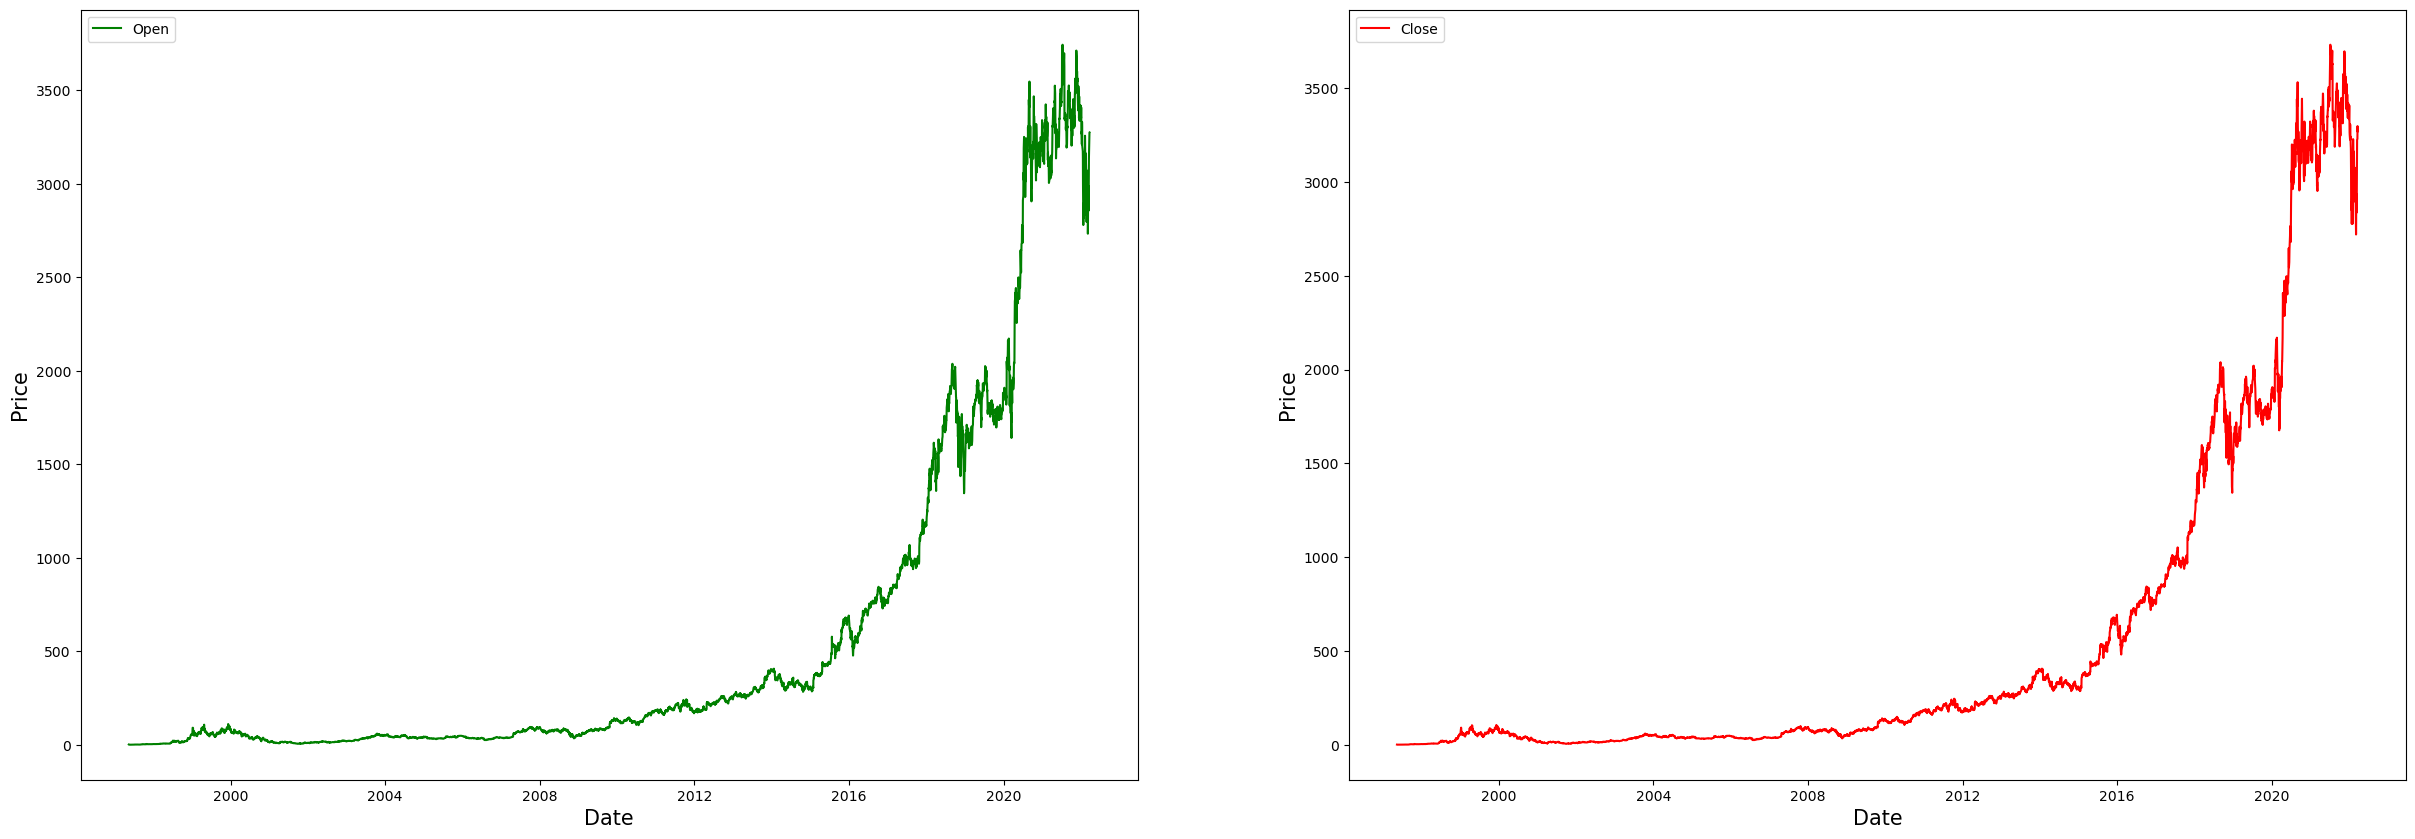

In [203]:
fg, ax =plt.subplots(1,2,figsize=(30,10))
ax[0].plot(Amzn_data['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend(loc='upper left')

ax[1].plot(Amzn_data['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend(loc='upper left')

fg.show()

In [293]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
Amzn_data[Amzn_data.columns] = MMS.fit_transform(Amzn_data)

C:\Users\Akshat tyagi\AppData\Local\Temp\ipykernel_5708\768739986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amzn_data[Amzn_data.columns] = MMS.fit_transform(Amzn_data)


In [205]:
Amzn_data.shape

(6257, 2)

In [206]:
training_size = round(len(Amzn_data) * 0.80) # Selected 80% data for training and 20% for testing
training_size

5006

In [262]:
Training_data=Amzn_data[:training_size]
Testing_data=Amzn_data[training_size:]

In [263]:
Training_data

,Open,Close
Date,,
1997-05-15,0.000276,0.000151
1997-05-16,0.000150,0.000089
1997-05-19,0.000095,0.000084
1997-05-20,0.000086,0.000064
1997-05-21,0.000061,0.000008
...,...,...
2017-03-30,0.233406,0.234569
2017-03-31,0.233954,0.237303
2017-04-03,0.236893,0.238636


In [264]:
Testing_data

,Open,Close
Date,,
2017-04-06,0.243786,0.240451
2017-04-07,0.240006,0.239539
2017-04-10,0.240000,0.242799
2017-04-11,0.241980,0.241544
2017-04-12,0.240925,0.239901
...,...,...
2022-03-18,0.837615,0.864236
2022-03-21,0.860637,0.865529
2022-03-22,0.864295,0.883746


In [265]:
Training_data.shape

(5006, 2)

In [266]:
Testing_data.shape

(1251, 2)

In [297]:
def sequence(dataset):
  Xdata = []
  Ydata = []
  si = 0

  for sti in range(50,len(dataset)): # Selecting 50 rows at a time
    Xdata.append(dataset.iloc[si:sti])
    Ydata.append(dataset.iloc[sti])
    si += 1
  return (np.array(Xdata),np.array(Ydata))

In [298]:
X_train, Y_train = sequence(Training_data)
X_test, Y_test = sequence(Testing_data)

In [299]:
print(X_train)

[[[2.75544200e-04 1.50803720e-04]
  [1.50296836e-04 8.93653463e-05]
  [9.46314304e-05 8.37798446e-05]
  ...
  [2.08745606e-04 2.40169067e-04]
  [2.39361539e-04 2.31791082e-04]
  [2.17095430e-04 2.23413098e-04]]

 [[1.50296836e-04 8.93653463e-05]
  [9.46314304e-05 8.37798446e-05]
  [8.62816062e-05 6.42313929e-05]
  ...
  [2.39361539e-04 2.31791082e-04]
  [2.17095430e-04 2.23413098e-04]
  [2.19878794e-04 2.48547051e-04]]

 [[9.46314304e-05 8.37798446e-05]
  [8.62816062e-05 6.42313929e-05]
  [6.12321335e-05 8.37798446e-06]
  ...
  [2.17095430e-04 2.23413098e-04]
  [2.19878794e-04 2.48547051e-04]
  [2.56061188e-04 2.90436973e-04]]

 ...

 [[2.17462496e-01 2.16335426e-01]
  [2.15196677e-01 2.18895735e-01]
  [2.19258035e-01 2.20118249e-01]
  ...
  [2.29157583e-01 2.34027045e-01]
  [2.33405980e-01 2.34568604e-01]
  [2.33953725e-01 2.37303165e-01]]

 [[2.15196677e-01 2.18895735e-01]
  [2.19258035e-01 2.20118249e-01]
  [2.20270695e-01 2.23893039e-01]
  ...
  [2.33405980e-01 2.34568604e-01]
  [2

In [300]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((4956, 50, 2), (4956, 2), (1201, 50, 2), (1201, 2))

In [301]:
X_train.shape

(4956, 50, 2)

In [302]:
Y_train.shape

(4956, 2)

In [303]:
X_test.shape

(1201, 50, 2)

In [304]:
Y_test.shape

(1201, 2)

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [440]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])


In [441]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1],X_train.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 50, 50)            10600     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_33 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [315]:
model.fit(X_train, Y_train, epochs=100,validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
155/155 [==============================] - 12s 47ms/step - loss: 1.4943e-04 - mean_absolute_error: 0.0056 - val_loss: 0.0057 - val_mean_absolute_error: 0.0559
Epoch 2/100
155/155 [==============================] - 6s 41ms/step - loss: 1.4126e-05 - mean_absolute_error: 0.0024 - val_loss: 0.0057 - val_mean_absolute_error: 0.0542
Epoch 3/100
155/155 [==============================] - 6s 41ms/step - loss: 1.3250e-05 - mean_absolute_error: 0.0023 - val_loss: 0.0060 - val_mean_absolute_error: 0.0561
Epoch 4/100
155/155 [==============================] - 6s 39ms/step - loss: 1.1918e-05 - mean_absolute_error: 0.0022 - val_loss: 0.0065 - val_mean_absolute_error: 0.0597
Epoch 5/100
155/155 [==============================] - 6s 40ms/step - loss: 1.1411e-05 - mean_absolute_error: 0.0021 - val_loss: 0.0042 - val_mean_absolute_error: 0.0469
Epoch 6/100
155/155 [==============================] - 6s 38ms/step - loss: 1.0675e-05 - mean_absolute_error: 0.0021 - val_loss: 0.0041 - val_mean_ab

In [442]:
import tensorflow as tf

In [443]:
tf.__version__

'2.13.0'

In [344]:
predictedtest = model.predict(X_test)
predictedtest[:5]
predictedtrain = model.predict(X_train)

155/155 [==============================] - 2s 11ms/step


In [345]:
predictedtest = MMS.inverse_transform(predictedtest)
predictedtest[:5]

array([[0.264084  , 0.26730913],
       [0.26777002, 0.2710201 ],
       [0.26578763, 0.26882344],
       [0.26667026, 0.26969224],
       [0.26697117, 0.26994893]], dtype=float32)

In [346]:
predictedtrain = MMS.inverse_transform(predictedtrain)
predictedtrain

array([[0.00044758, 0.00049265],
       [0.00045716, 0.0005026 ],
       [0.00049049, 0.00053705],
       ...,
       [0.2351485 , 0.23773098],
       [0.23689541, 0.23944202],
       [0.23964044, 0.24219613]], dtype=float32)

In [347]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,predictedtrain))

0.001253820975926216

In [437]:
np.sqrt(mean_squared_error(Y_test,predictedtest))

0.038764424714145686

In [438]:
math.sqrt(mean_squared_error(Y_train,predictedtrain))

0.001253820975926216

In [357]:
Amzn_merge_data = pd.concat([Amzn_data.iloc[-1201:].copy(),pd.DataFrame(predictedtest,columns=['open_predicted','close_predicted'],index=Amzn_data.iloc[-1201:].index)], axis=1)

Amzn_merge_data

In [358]:
Amzn_merge_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2017-06-19,0.271361,0.266426,0.264084,0.267309
2017-06-20,0.266284,0.265735,0.267770,0.271020
2017-06-21,0.266471,0.268319,0.265788,0.268823
2017-06-22,0.267414,0.268070,0.266670,0.269692
2017-06-23,0.267497,0.268724,0.266971,0.269949


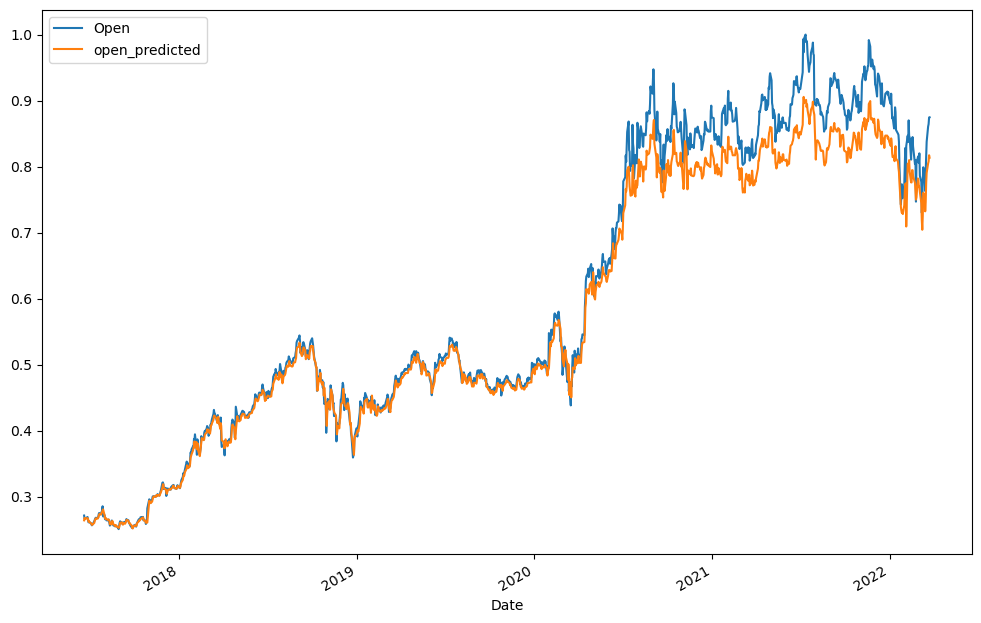

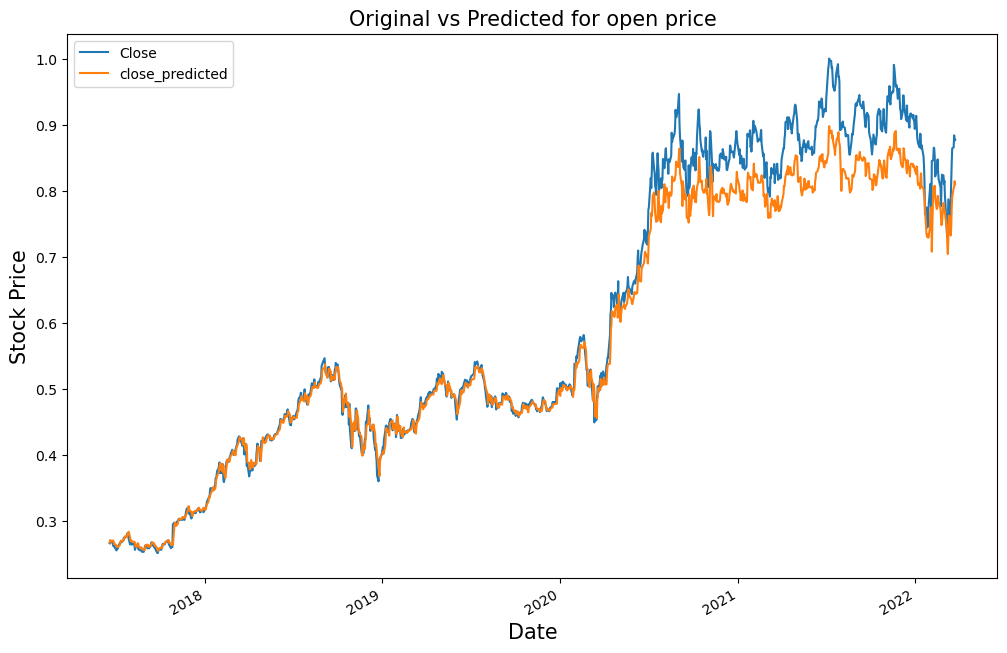

In [370]:
Amzn_merge_data[['Open','open_predicted']].plot(figsize=(12,8))
Amzn_merge_data[['Close','close_predicted']].plot(figsize=(12,8))
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Original vs Predicted for open price',size=15)
plt.show()

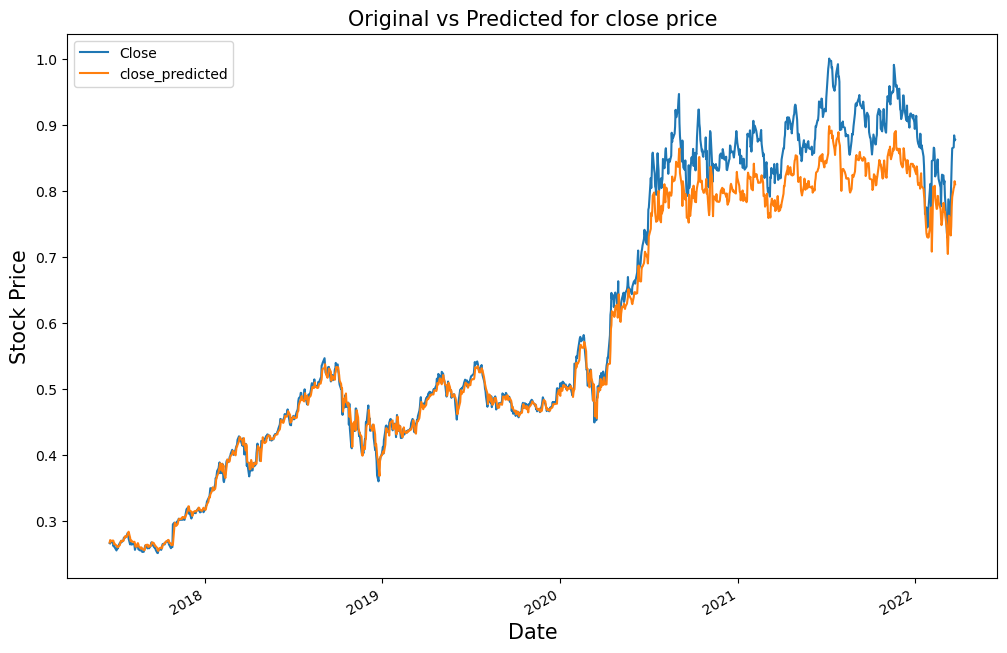

In [444]:

Amzn_merge_data[['Close','close_predicted']].plot(figsize=(12,8))
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Original vs Predicted for close price',size=15)
plt.show()

In [373]:
len(Testing_data)

1251

In [374]:
len(Training_data)

5006

In [403]:
Amzn_merge_data = Amzn_merge_data.append(pd.DataFrame(columns=Amzn_merge_data.columns,index=pd.date_range(start=Amzn_merge_data.index[-1], periods=31, freq='D', closed='right')))

C:\Users\Akshat tyagi\AppData\Local\Temp\ipykernel_5708\2456020017.py:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  Amzn_merge_data = Amzn_merge_data.append(pd.DataFrame(columns=Amzn_merge_data.columns,index=pd.date_range(start=Amzn_merge_data.index[-1], periods=31, freq='D', closed='right')))
C:\Users\Akshat tyagi\AppData\Local\Temp\ipykernel_5708\2456020017.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Amzn_merge_data = Amzn_merge_data.append(pd.DataFrame(columns=Amzn_merge_data.columns,index=pd.date_range(start=Amzn_merge_data.index[-1], periods=31, freq='D', closed='right')))


In [404]:
Amzn_merge_data

,Open,Close,open_predicted,close_predicted
2017-06-19,0.271361,0.266426,0.264084,0.267309
2017-06-20,0.266284,0.265735,0.267770,0.271020
2017-06-21,0.266471,0.268319,0.265788,0.268823
2017-06-22,0.267414,0.268070,0.266670,0.269692
2017-06-23,0.267497,0.268724,0.266971,0.269949
...,...,...,...,...
2022-04-19,NaN,NaN,NaN,NaN
2022-04-20,NaN,NaN,NaN,NaN
2022-04-21,NaN,NaN,NaN,NaN
2022-04-22,NaN,NaN,NaN,NaN


In [405]:
Amzn_data

,Open,Close
Date,,
1997-05-15,0.000276,0.000151
1997-05-16,0.000150,0.000089
1997-05-19,0.000095,0.000084
1997-05-20,0.000086,0.000064
1997-05-21,0.000061,0.000008
...,...,...
2022-03-18,0.837615,0.864236
2022-03-21,0.860637,0.865529
2022-03-22,0.864295,0.883746


In [406]:
Amzn_merge_data['2022-03-24':'2022-04-23'] #30 days prediction

,Open,Close,open_predicted,close_predicted
2022-03-24,0.874683,0.8771,0.81346,0.809738
2022-03-25,NaN,NaN,NaN,NaN
2022-03-26,NaN,NaN,NaN,NaN
2022-03-27,NaN,NaN,NaN,NaN
2022-03-28,NaN,NaN,NaN,NaN
2022-03-29,NaN,NaN,NaN,NaN
2022-03-30,NaN,NaN,NaN,NaN
2022-03-31,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN
2022-04-02,NaN,NaN,NaN,NaN


In [422]:
futureprediction = pd.DataFrame(columns=['Open','Close'],index=Amzn_merge_data.index)

In [423]:
futureprediction.index=pd.to_datetime(futureprediction.index)

In [424]:
futureprediction

,Open,Close
2017-06-19,NaN,NaN
2017-06-20,NaN,NaN
2017-06-21,NaN,NaN
2017-06-22,NaN,NaN
2017-06-23,NaN,NaN
...,...,...
2022-04-19,NaN,NaN
2022-04-20,NaN,NaN
2022-04-21,NaN,NaN
2022-04-22,NaN,NaN


In [425]:
new=X_test[-1:]
for i in range(-30,0):
    new_predict=model.predict(new)
    futureprediction.iloc[i]=new_predict
    new=np.append(new[0][1:],new_predict,axis=0)
    new=new.reshape(X_test[-1:].shape)

1/1 [==============================] - 0s 31ms/step


In [426]:
futureprediction[['Open','Close']] = MMS.inverse_transform(futureprediction[['Open','Close']])

In [427]:
futureprediction

,Open,Close
2017-06-19,NaN,NaN
2017-06-20,NaN,NaN
2017-06-21,NaN,NaN
2017-06-22,NaN,NaN
2017-06-23,NaN,NaN
...,...,...
2022-04-19,0.583328,0.588278
2022-04-20,0.579659,0.584620
2022-04-21,0.576042,0.581013
2022-04-22,0.572469,0.577448


In [428]:
print(Amzn_merge_data.columns)

Index(['Open', 'Close', 'open_predicted', 'close_predicted'], dtype='object')


C:\Users\Akshat tyagi\AppData\Local\Temp\ipykernel_5708\244861546.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


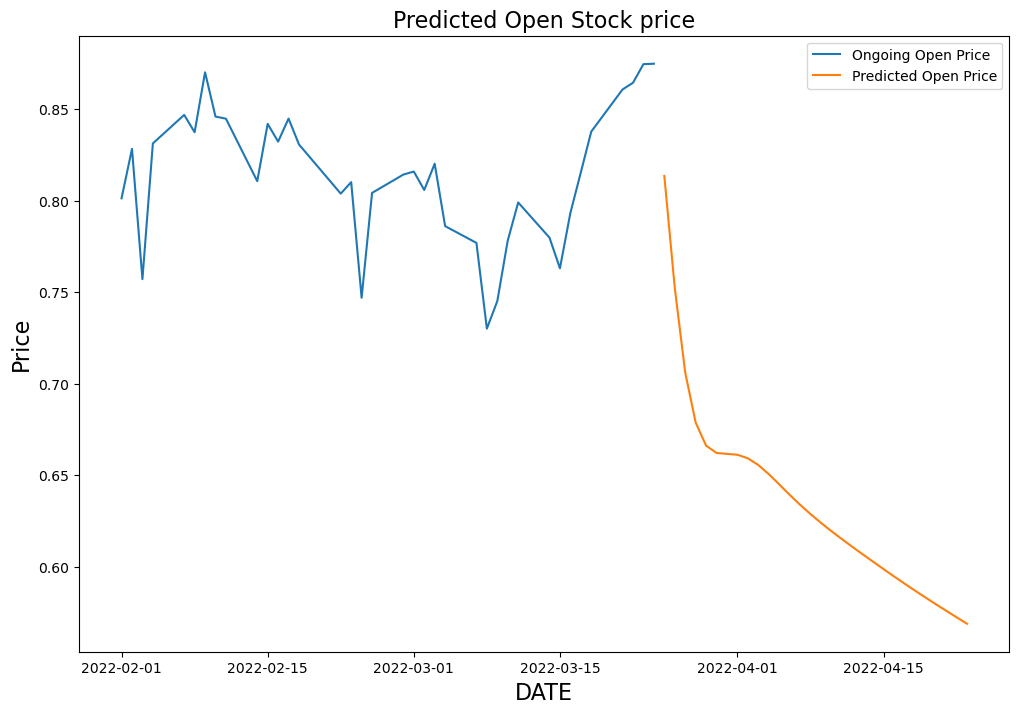

In [436]:
fig,axes=plt.subplots(figsize=(12,8))
axes.plot(Amzn_merge_data.loc['2022-02-01':,'Open'], label='Ongoing Open Price')
axes.plot(futureprediction.loc['2022-02-01':,'Open'],label='Predicted Open Price')
axes.set_xlabel('DATE',size=16)
axes.set_ylabel('Price',size=16)
axes.set_title('Predicted Open Stock price',size=16)
axes.legend()
fig.show()

C:\Users\Akshat tyagi\AppData\Local\Temp\ipykernel_5708\1221402424.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


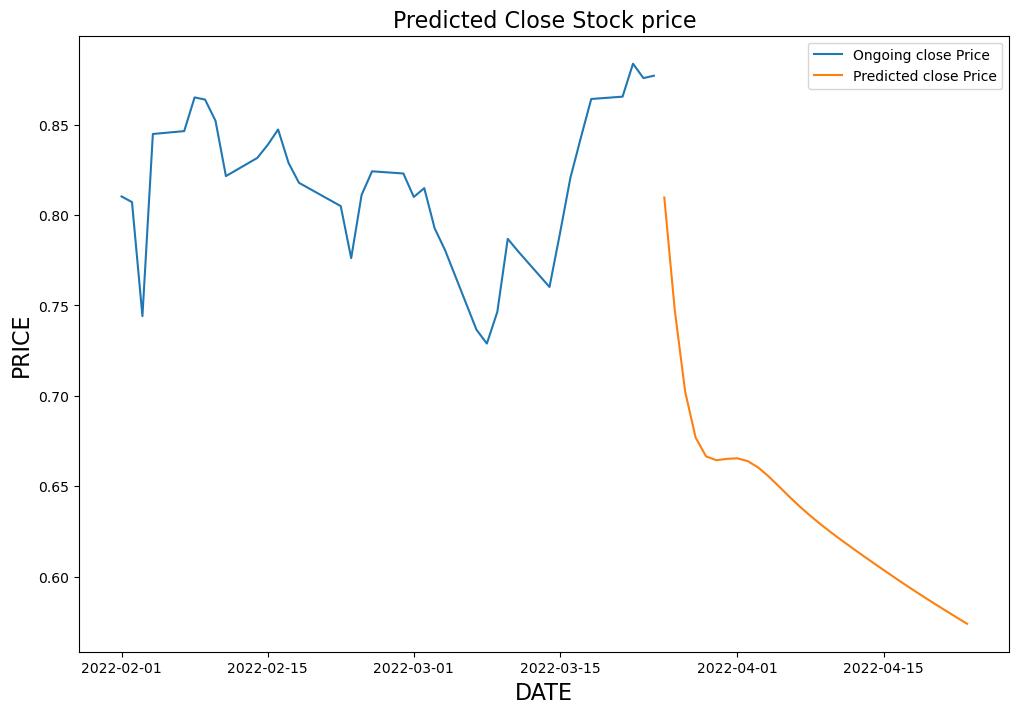

In [434]:
fig,axes=plt.subplots(figsize=(12,8))
axes.plot(Amzn_merge_data.loc['2022-02-01':,'Close'], label='Ongoing close Price')
axes.plot(futureprediction.loc['2022-02-01':,'Close'],label='Predicted close Price')
axes.set_xlabel('DATE',size=16)
axes.set_ylabel('PRICE',size=16)
axes.set_title('Predicted Close Stock price',size=16)
axes.legend()
fig.show()